# Model Speed Comparison Cookbook

You can also check this cookbook in colab [here](https://colab.research.google.com/drive/1oZfsgYfPPLVtMeA6DhsCd5jbdiAzEQSW?usp=sharing)

## Overview
In this section, we'll explore the speed of different AI models by creating instances of `ChatAgent` and measuring their response times to user prompts.

### Installation

Ensure you have CAMEL AI installed in your Python environment:

In [ ]:
%pip install "camel-ai[all]==0.2.3a"

### Setting Up API Keys

You'll need to set up your API keys for OpenAI and SambaNova.

In [2]:
import os
from getpass import getpass

# Prompt for the API key securely
openai_api_key = getpass('Enter your OpenAI API key: ')
os.environ["OPENAI_API_KEY"] = openai_api_key

sambanova_api_key = getpass('Enter your SambaNova API key: ')
os.environ["SAMBA_API_KEY"] = sambanova_api_key

Enter your OpenAI API key: ··········
Enter your SambaNova API key: ··········


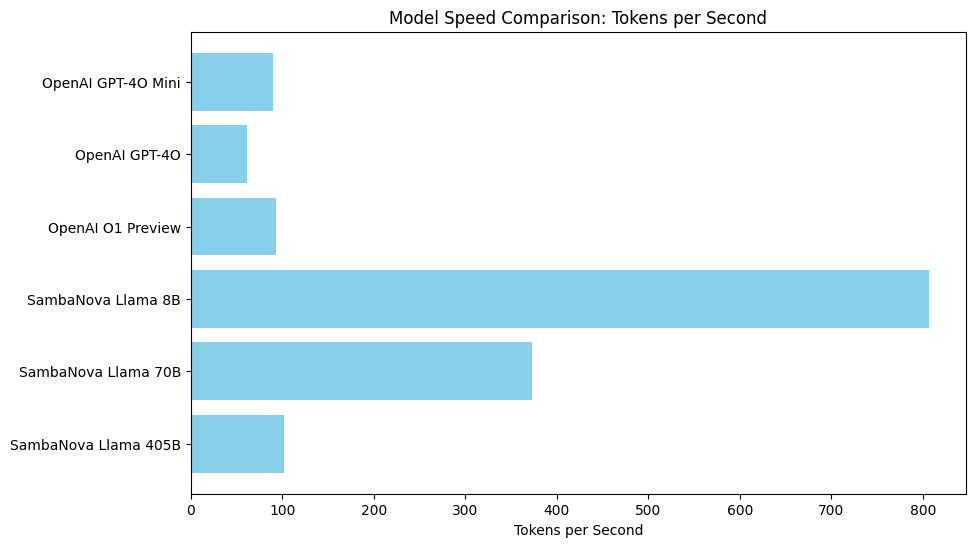

In [6]:
import time
import matplotlib.pyplot as plt
from camel.agents import ChatAgent
from camel.configs import SambaCloudAPIConfig, ChatGPTConfig
from camel.messages import BaseMessage
from camel.models import ModelFactory
from camel.types import ModelPlatformType, ModelType

# Create model instances
def create_models():
    model_configs = [
        (ModelPlatformType.OPENAI, ModelType.GPT_4O_MINI, ChatGPTConfig(temperature=0.0, max_tokens=2000), "OpenAI GPT-4O Mini"),
        (ModelPlatformType.OPENAI, ModelType.GPT_4O, ChatGPTConfig(temperature=0.0, max_tokens=2000), "OpenAI GPT-4O"),
        (ModelPlatformType.OPENAI, ModelType.O1_PREVIEW, ChatGPTConfig(temperature=0.0), "OpenAI O1 Preview"),
        (ModelPlatformType.SAMBA, "Meta-Llama-3.1-8B-Instruct", SambaCloudAPIConfig(temperature=0.0, max_tokens=2000), "SambaNova Llama 8B"),
        (ModelPlatformType.SAMBA, "Meta-Llama-3.1-70B-Instruct", SambaCloudAPIConfig(temperature=0.0, max_tokens=2000), "SambaNova Llama 70B"),
        (ModelPlatformType.SAMBA, "Meta-Llama-3.1-405B-Instruct", SambaCloudAPIConfig(temperature=0.0, max_tokens=2000), "SambaNova Llama 405B")
    ]

    models = [(ModelFactory.create(model_platform=platform, model_type=model_type, model_config_dict=config.as_dict(), url="https://api.sambanova.ai/v1" if platform == ModelPlatformType.SAMBA else None), name)
              for platform, model_type, config, name in model_configs]
    return models

# Define messages
def create_messages():
    sys_msg = BaseMessage.make_assistant_message(role_name="Assistant", content="You are a helpful assistant.")
    user_msg = BaseMessage.make_user_message(role_name="User", content="Tell me a long story.")
    return sys_msg, user_msg

# Initialize ChatAgent instances
def initialize_agents(models, sys_msg):
    return [(ChatAgent(system_message=sys_msg, model=model), name) for model, name in models]

# Measure response time for a given agent
def measure_response_time(agent, message):
    start_time = time.time()
    response = agent.step(message)
    end_time = time.time()
    tokens_per_second = response.info['usage']["completion_tokens"] / (end_time - start_time)
    return tokens_per_second

# Visualize results
def plot_results(model_names, tokens_per_sec):
    plt.figure(figsize=(10, 6))
    plt.barh(model_names, tokens_per_sec, color='skyblue')
    plt.xlabel("Tokens per Second")
    plt.title("Model Speed Comparison: Tokens per Second")
    plt.gca().invert_yaxis()
    plt.show()

# Main execution
models = create_models()
sys_msg, user_msg = create_messages()
agents = initialize_agents(models, sys_msg)

# Measure response times and collect data
model_names = []
tokens_per_sec = []

for agent, model_name in agents:
    model_names.append(model_name)
    tokens_per_sec.append(measure_response_time(agent, user_msg))

# Visualize the results
plot_results(model_names, tokens_per_sec)